In [ ]:
pip install us

In [69]:
import pandas as pd
import us
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Final Project/Vaccine_Data.csv'
vaccine_df = pd.read_csv(file_path)
vaccine_df.head()

,Year,County,State,Administered_Dose_Count
0,2020,Brevard County,FL,6266.0
1,2020,Broward County,FL,21075.0
2,2020,Collier County,FL,3110.0
3,2020,Cook County,IL,56411.0
4,2020,Davidson County,TN,13706.0


In [5]:
vaccine_df['State'] = vaccine_df['State'].apply(lambda x: us.states.lookup(x).name if us.states.lookup(x) else x)
vaccine_df.head()

,Year,County,State,Administered_Dose_Count
0,2020,Brevard County,Florida,6266.0
1,2020,Broward County,Florida,21075.0
2,2020,Collier County,Florida,3110.0
3,2020,Cook County,Illinois,56411.0
4,2020,Davidson County,Tennessee,13706.0


In [6]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9767 entries, 0 to 9766
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     9767 non-null   int64  
 1   County                   9767 non-null   object 
 2   State                    9767 non-null   object 
 3   Administered_Dose_Count  9767 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 305.3+ KB


In [7]:
file_path = '/content/drive/MyDrive/Final Project/Merged_Death_Census_Data.csv'
deaths_census = pd.read_csv(file_path)
deaths_census.drop(columns=['Unnamed: 0'], inplace=True)
deaths_census.head()

,Covid Deaths Start Date,Covid Deaths End Date,State,County name,Deaths from All Causes,Population 2023,Death Per 100k
0,01/01/2020,06/24/2023,Alaska,Aleutians East Borough,25,3461,722.334585
1,01/01/2020,06/24/2023,Alaska,Anchorage Municipality,8869,286075,3100.235952
2,01/01/2020,06/24/2023,Alaska,Bethel Census Area,395,18224,2167.471466
3,01/01/2020,06/24/2023,Alaska,Denali Borough,31,1584,1957.070707
4,01/01/2020,06/24/2023,Alaska,Dillingham Census Area,115,4607,2496.201433


In [8]:
deaths_census.rename(columns={'County name': 'County'}, inplace=True)
deaths_census.head()

,Covid Deaths Start Date,Covid Deaths End Date,State,County,Deaths from All Causes,Population 2023,Death Per 100k
0,01/01/2020,06/24/2023,Alaska,Aleutians East Borough,25,3461,722.334585
1,01/01/2020,06/24/2023,Alaska,Anchorage Municipality,8869,286075,3100.235952
2,01/01/2020,06/24/2023,Alaska,Bethel Census Area,395,18224,2167.471466
3,01/01/2020,06/24/2023,Alaska,Denali Borough,31,1584,1957.070707
4,01/01/2020,06/24/2023,Alaska,Dillingham Census Area,115,4607,2496.201433


In [9]:
file_path = '/content/drive/MyDrive/Final Project/census2020-2023.csv'
census = pd.read_csv(file_path)
census.head()

,STNAME,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023
0,Alabama,Autauga County,58915,59203,59726,60342
1,Alabama,Baldwin County,233227,239439,246531,253507
2,Alabama,Barbour County,24969,24533,24700,24585
3,Alabama,Bibb County,22188,22359,21986,21868
4,Alabama,Blount County,59107,59079,59516,59816


In [10]:
census.rename(columns={'CTYNAME': 'County', 'STNAME': 'State'}, inplace=True)
census.head()

,State,County,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023
0,Alabama,Autauga County,58915,59203,59726,60342
1,Alabama,Baldwin County,233227,239439,246531,253507
2,Alabama,Barbour County,24969,24533,24700,24585
3,Alabama,Bibb County,22188,22359,21986,21868
4,Alabama,Blount County,59107,59079,59516,59816


In [11]:
file_path = '/content/drive/MyDrive/Final Project/counties20_23.csv'
climate = pd.read_csv(file_path)
climate.head()

,Name,State,Avg 2020,Max 2020,Min 2020,Avg 2021,Max 2021,Min 2021,Avg 2022,Max 2022,Min 2022,Avg 2023,Max 2023,Min 2023
0,Autauga County,Alabama,66.2,77.3,55.1,65.6,76.7,54.5,65.1,77.2,53.1,66.4,78.1,54.6
1,Baldwin County,Alabama,68.9,78.9,58.8,67.9,77.7,58.0,68.4,78.9,57.8,69.8,80.2,59.4
2,Barbour County,Alabama,66.1,76.9,55.3,65.2,76.2,54.3,65.4,77.1,53.7,66.7,77.8,55.6
3,Bibb County,Alabama,64.0,75.3,52.7,63.4,74.6,52.2,63.6,75.6,51.5,64.7,76.6,52.8
4,Blount County,Alabama,62.6,72.3,53.0,62.4,72.1,52.7,62.2,72.5,51.8,63.3,73.8,52.7


In [12]:
climate.rename(columns={'Name': 'County'}, inplace=True)
climate.head()

,County,State,Avg 2020,Max 2020,Min 2020,Avg 2021,Max 2021,Min 2021,Avg 2022,Max 2022,Min 2022,Avg 2023,Max 2023,Min 2023
0,Autauga County,Alabama,66.2,77.3,55.1,65.6,76.7,54.5,65.1,77.2,53.1,66.4,78.1,54.6
1,Baldwin County,Alabama,68.9,78.9,58.8,67.9,77.7,58.0,68.4,78.9,57.8,69.8,80.2,59.4
2,Barbour County,Alabama,66.1,76.9,55.3,65.2,76.2,54.3,65.4,77.1,53.7,66.7,77.8,55.6
3,Bibb County,Alabama,64.0,75.3,52.7,63.4,74.6,52.2,63.6,75.6,51.5,64.7,76.6,52.8
4,Blount County,Alabama,62.6,72.3,53.0,62.4,72.1,52.7,62.2,72.5,51.8,63.3,73.8,52.7


In [13]:
file_path = '/content/drive/MyDrive/Final Project/cc-est2023-agesex-all.csv'
age = pd.read_csv(file_path, encoding='latin-1')
age.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58809,28698,30111,3491,...,1053,1144,494,650,893,332,561,39.1,37.9,40.2
1,50,1,1,Alabama,Autauga County,2,58915,28760,30155,3504,...,1063,1148,494,654,896,337,559,39.1,37.9,40.2
2,50,1,1,Alabama,Autauga County,3,59203,28782,30421,3441,...,1071,1170,478,692,911,354,557,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59726,29030,30696,3463,...,1142,1211,477,734,962,388,574,39.3,38.1,40.4
4,50,1,1,Alabama,Autauga County,5,60342,29277,31065,3617,...,1163,1304,484,820,1036,427,609,39.5,38.3,40.6


In [14]:
age = age[age['YEAR'] == 5]
age.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
4,50,1,1,Alabama,Autauga County,5,60342,29277,31065,3617,...,1163,1304,484,820,1036,427,609,39.5,38.3,40.6
9,50,1,3,Alabama,Baldwin County,5,253507,123497,130010,12860,...,6006,6657,3071,3586,4847,2039,2808,44.2,43.0,45.3
14,50,1,5,Alabama,Barbour County,5,24585,13066,11519,1307,...,615,629,261,368,527,187,340,41.5,39.3,44.5
19,50,1,7,Alabama,Bibb County,5,21868,11530,10338,1167,...,488,504,228,276,422,121,301,41.2,39.6,43.4
24,50,1,9,Alabama,Blount County,5,59816,29756,30060,3493,...,1334,1379,611,768,1185,477,708,41.2,40.3,42.0


In [15]:
age.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'POPESTIMATE',
       'POPEST_MALE', 'POPEST_FEM', 'UNDER5_TOT', 'UNDER5_MALE', 'UNDER5_FEM',
       'AGE513_TOT', 'AGE513_MALE', 'AGE513_FEM', 'AGE1417_TOT',
       'AGE1417_MALE', 'AGE1417_FEM', 'AGE1824_TOT', 'AGE1824_MALE',
       'AGE1824_FEM', 'AGE16PLUS_TOT', 'AGE16PLUS_MALE', 'AGE16PLUS_FEM',
       'AGE18PLUS_TOT', 'AGE18PLUS_MALE', 'AGE18PLUS_FEM', 'AGE1544_TOT',
       'AGE1544_MALE', 'AGE1544_FEM', 'AGE2544_TOT', 'AGE2544_MALE',
       'AGE2544_FEM', 'AGE4564_TOT', 'AGE4564_MALE', 'AGE4564_FEM',
       'AGE65PLUS_TOT', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM', 'AGE04_TOT',
       'AGE04_MALE', 'AGE04_FEM', 'AGE59_TOT', 'AGE59_MALE', 'AGE59_FEM',
       'AGE1014_TOT', 'AGE1014_MALE', 'AGE1014_FEM', 'AGE1519_TOT',
       'AGE1519_MALE', 'AGE1519_FEM', 'AGE2024_TOT', 'AGE2024_MALE',
       'AGE2024_FEM', 'AGE2529_TOT', 'AGE2529_MALE', 'AGE2529_FEM',
       'AGE3034_TOT', 'AGE3034_MALE', 'AGE3034_FEM', 'AGE3539_TOT',
   

In [16]:
age_simple = age[['STNAME', 'CTYNAME', 'UNDER5_TOT', 'AGE65PLUS_TOT']]
age_simple.head()

,STNAME,CTYNAME,UNDER5_TOT,AGE65PLUS_TOT
4,Alabama,Autauga County,3617,10127
9,Alabama,Baldwin County,12860,55923
14,Alabama,Barbour County,1307,5060
19,Alabama,Bibb County,1167,3999
24,Alabama,Blount County,3493,11481


In [17]:
age_simple.rename(columns={'STNAME': 'State', 'CTYNAME': 'County'}, inplace=True)
age_simple.head()

<ipython-input-17-3fa3ddc97aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_simple.rename(columns={'STNAME': 'State', 'CTYNAME': 'County'}, inplace=True)


,State,County,UNDER5_TOT,AGE65PLUS_TOT
4,Alabama,Autauga County,3617,10127
9,Alabama,Baldwin County,12860,55923
14,Alabama,Barbour County,1307,5060
19,Alabama,Bibb County,1167,3999
24,Alabama,Blount County,3493,11481


In [18]:
merged_df = vaccine_df.merge(deaths_census, on=['County', 'State'], how='outer') \
               .merge(climate, on=['County', 'State'], how='outer')\
               .merge(census, on=['County', 'State'], how='outer')\
               .merge(age_simple, on=['County', 'State'], how='outer')
merged_df.drop(columns=['Population 2023'], inplace=True)
merged_df.head()

,Year,County,State,Administered_Dose_Count,Covid Deaths Start Date,Covid Deaths End Date,Deaths from All Causes,Death Per 100k,Avg 2020,Max 2020,...,Min 2022,Avg 2023,Max 2023,Min 2023,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,UNDER5_TOT,AGE65PLUS_TOT
0,2021.0,Abbeville County,South Carolina,10308.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
1,2022.0,Abbeville County,South Carolina,11362.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
2,2023.0,Abbeville County,South Carolina,11411.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
3,2021.0,Acadia Parish,Louisiana,35002.0,01/01/2020,06/24/2023,2213.0,3917.576873,69.1,78.4,...,57.8,70.9,81.2,60.6,57478.0,57217.0,56725.0,56489.0,3897.0,9578.0
4,2022.0,Acadia Parish,Louisiana,37424.0,01/01/2020,06/24/2023,2213.0,3917.576873,69.1,78.4,...,57.8,70.9,81.2,60.6,57478.0,57217.0,56725.0,56489.0,3897.0,9578.0


In [19]:
merged_df = merged_df.dropna()

In [20]:
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df.head()

,Year,County,State,Administered_Dose_Count,Covid Deaths Start Date,Covid Deaths End Date,Deaths from All Causes,Death Per 100k,Avg 2020,Max 2020,...,Min 2022,Avg 2023,Max 2023,Min 2023,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,UNDER5_TOT,AGE65PLUS_TOT
0,2021,Abbeville County,South Carolina,10308.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
1,2022,Abbeville County,South Carolina,11362.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
2,2023,Abbeville County,South Carolina,11411.0,01/01/2020,06/24/2023,767.0,3139.068511,63.1,73.4,...,51.6,63.3,74.5,52.2,24266.0,24262.0,24338.0,24434.0,1175.0,5691.0
3,2021,Acadia Parish,Louisiana,35002.0,01/01/2020,06/24/2023,2213.0,3917.576873,69.1,78.4,...,57.8,70.9,81.2,60.6,57478.0,57217.0,56725.0,56489.0,3897.0,9578.0
4,2022,Acadia Parish,Louisiana,37424.0,01/01/2020,06/24/2023,2213.0,3917.576873,69.1,78.4,...,57.8,70.9,81.2,60.6,57478.0,57217.0,56725.0,56489.0,3897.0,9578.0


In [ ]:
merged_df.columns

Index(['Year', 'County', 'State', 'Administered_Dose_Count',
       'Covid Deaths Start Date', 'Covid Deaths End Date',
       'Deaths from All Causes', 'Death Per 100k', 'Avg 2020', 'Max 2020',
       'Min 2020', 'Avg 2021', 'Max 2021', 'Min 2021', 'Avg 2022', 'Max 2022',
       'Min 2022', 'Avg 2023', 'Max 2023', 'Min 2023', 'POPESTIMATE2020',
       'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023', 'UNDER5_TOT',
       'AGE65PLUS_TOT'],
      dtype='object')

In [ ]:
#merged_df.to_csv('/content/drive/MyDrive/Final Project/merged_file.csv', index=False)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8911 entries, 0 to 9840
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     8911 non-null   int64  
 1   County                   8911 non-null   object 
 2   State                    8911 non-null   object 
 3   Administered_Dose_Count  8911 non-null   float64
 4   Covid Deaths Start Date  8911 non-null   object 
 5   Covid Deaths End Date    8911 non-null   object 
 6   Deaths from All Causes   8911 non-null   float64
 7   Death Per 100k           8911 non-null   float64
 8   Avg 2020                 8911 non-null   float64
 9   Max 2020                 8911 non-null   float64
 10  Min 2020                 8911 non-null   float64
 11  Avg 2021                 8911 non-null   float64
 12  Max 2021                 8911 non-null   float64
 13  Min 2021                 8911 non-null   float64
 14  Avg 2022                 8911

In [21]:
merged_2023 = merged_df[merged_df['Year'] == 2023]
merged_2023 = merged_2023[['County', 'State', 'Administered_Dose_Count', 'Death Per 100k', 'Avg 2023', 'Max 2023', 'Min 2023', 'POPESTIMATE2023', 'UNDER5_TOT', 'AGE65PLUS_TOT']]
merged_2023 = merged_2023.rename(columns = {'Avg 2023': 'Avg Temp (F)', 'Max 2023': 'Max Temp (F)', 'Min 2023': 'Min Temp (F)',
                                            'POPESTIMATE2023': 'Population Estimate', 'UNDER5_TOT': 'Population Under 5 Years Old', 'AGE65PLUS_TOT' : 'Population Over 65 Years Old'})
merged_2023.head()

,County,State,Administered_Dose_Count,Death Per 100k,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Population Under 5 Years Old,Population Over 65 Years Old
2,Abbeville County,South Carolina,11411.0,3139.068511,63.3,74.5,52.2,24434.0,1175.0,5691.0
5,Acadia Parish,Louisiana,37515.0,3917.576873,70.9,81.2,60.6,56489.0,3897.0,9578.0
8,Accomack County,Virginia,28028.0,4867.775806,60.1,69.1,51.1,33239.0,1708.0,8894.0
11,Ada County,Idaho,362247.0,3086.493873,52.0,63.8,40.3,524673.0,25984.0,88036.0
14,Adair County,Iowa,3907.0,4547.300041,51.2,62.7,39.7,7389.0,461.0,1698.0


In [22]:
merged_2023['Administered Dose Per 100k'] = merged_2023['Administered_Dose_Count'] / merged_2023['Population Estimate'] * 100000
merged_2023['5 Under Per 100k'] = merged_2023['Population Under 5 Years Old'] / merged_2023['Population Estimate'] * 100000
merged_2023['65 Up Per 100k'] = merged_2023['Population Over 65 Years Old'] / merged_2023['Population Estimate'] * 100000
merged_2023.head()

,County,State,Administered_Dose_Count,Death Per 100k,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Population Under 5 Years Old,Population Over 65 Years Old,Administered Dose Per 100k,5 Under Per 100k,65 Up Per 100k
2,Abbeville County,South Carolina,11411.0,3139.068511,63.3,74.5,52.2,24434.0,1175.0,5691.0,46701.317836,4808.872882,23291.315380
5,Acadia Parish,Louisiana,37515.0,3917.576873,70.9,81.2,60.6,56489.0,3897.0,9578.0,66411.159695,6898.688240,16955.513463
8,Accomack County,Virginia,28028.0,4867.775806,60.1,69.1,51.1,33239.0,1708.0,8894.0,84322.633052,5138.542074,26757.724360
11,Ada County,Idaho,362247.0,3086.493873,52.0,63.8,40.3,524673.0,25984.0,88036.0,69042.432143,4952.417982,16779.212957
14,Adair County,Iowa,3907.0,4547.300041,51.2,62.7,39.7,7389.0,461.0,1698.0,52875.896603,6239.003925,22980.105562


In [ ]:
#merged_2023.to_csv('/content/drive/MyDrive/Final Project/ML_file.csv', index = False)

In [23]:
merged_2023 = merged_2023.drop(columns=['Administered_Dose_Count', 'Population Under 5 Years Old', 'Population Over 65 Years Old'])
merged_2023.head()

,County,State,Death Per 100k,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Administered Dose Per 100k,5 Under Per 100k,65 Up Per 100k
2,Abbeville County,South Carolina,3139.068511,63.3,74.5,52.2,24434.0,46701.317836,4808.872882,23291.315380
5,Acadia Parish,Louisiana,3917.576873,70.9,81.2,60.6,56489.0,66411.159695,6898.688240,16955.513463
8,Accomack County,Virginia,4867.775806,60.1,69.1,51.1,33239.0,84322.633052,5138.542074,26757.724360
11,Ada County,Idaho,3086.493873,52.0,63.8,40.3,524673.0,69042.432143,4952.417982,16779.212957
14,Adair County,Iowa,4547.300041,51.2,62.7,39.7,7389.0,52875.896603,6239.003925,22980.105562


In [58]:
y = merged_2023['Death Per 100k'].values.reshape(-1, 1)
print(y[:5])
X = merged_2023.drop(columns=['Death Per 100k'])
X.head()

[[3139.06851109]
 [3917.57687337]
 [4867.77580553]
 [3086.49387333]
 [4547.3000406 ]]


,County,State,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Administered Dose Per 100k,5 Under Per 100k,65 Up Per 100k
2,Abbeville County,South Carolina,63.3,74.5,52.2,24434.0,46701.317836,4808.872882,23291.315380
5,Acadia Parish,Louisiana,70.9,81.2,60.6,56489.0,66411.159695,6898.688240,16955.513463
8,Accomack County,Virginia,60.1,69.1,51.1,33239.0,84322.633052,5138.542074,26757.724360
11,Ada County,Idaho,52.0,63.8,40.3,524673.0,69042.432143,4952.417982,16779.212957
14,Adair County,Iowa,51.2,62.7,39.7,7389.0,52875.896603,6239.003925,22980.105562


In [59]:
X = pd.get_dummies(X, columns=['State', 'County'])
X.head()

,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Administered Dose Per 100k,5 Under Per 100k,65 Up Per 100k,State_Alabama,State_Arizona,State_Arkansas,...,County_Yellowstone County,County_Yoakum County,County_Yolo County,County_York County,County_Young County,County_Yuba County,County_Yuma County,County_Zapata County,County_Zavala County,County_Ziebach County
2,63.3,74.5,52.2,24434.0,46701.317836,4808.872882,23291.315380,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,70.9,81.2,60.6,56489.0,66411.159695,6898.688240,16955.513463,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,60.1,69.1,51.1,33239.0,84322.633052,5138.542074,26757.724360,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,52.0,63.8,40.3,524673.0,69042.432143,4952.417982,16779.212957,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,51.2,62.7,39.7,7389.0,52875.896603,6239.003925,22980.105562,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [61]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [62]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [63]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [64]:
# Creating the decision tree regressor instance
regressor = DecisionTreeRegressor(random_state=42)

In [65]:
# Fitting the model
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [66]:
# Making predictions using the testing data
predictions = regressor.predict(X_test_scaled)

In [67]:
# Calculating the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1778540.6245


In [70]:
# Calculate R² score
r2 = r2_score(y_test, predictions)

print("R² score:", r2)

R² score: -0.25689425320501047


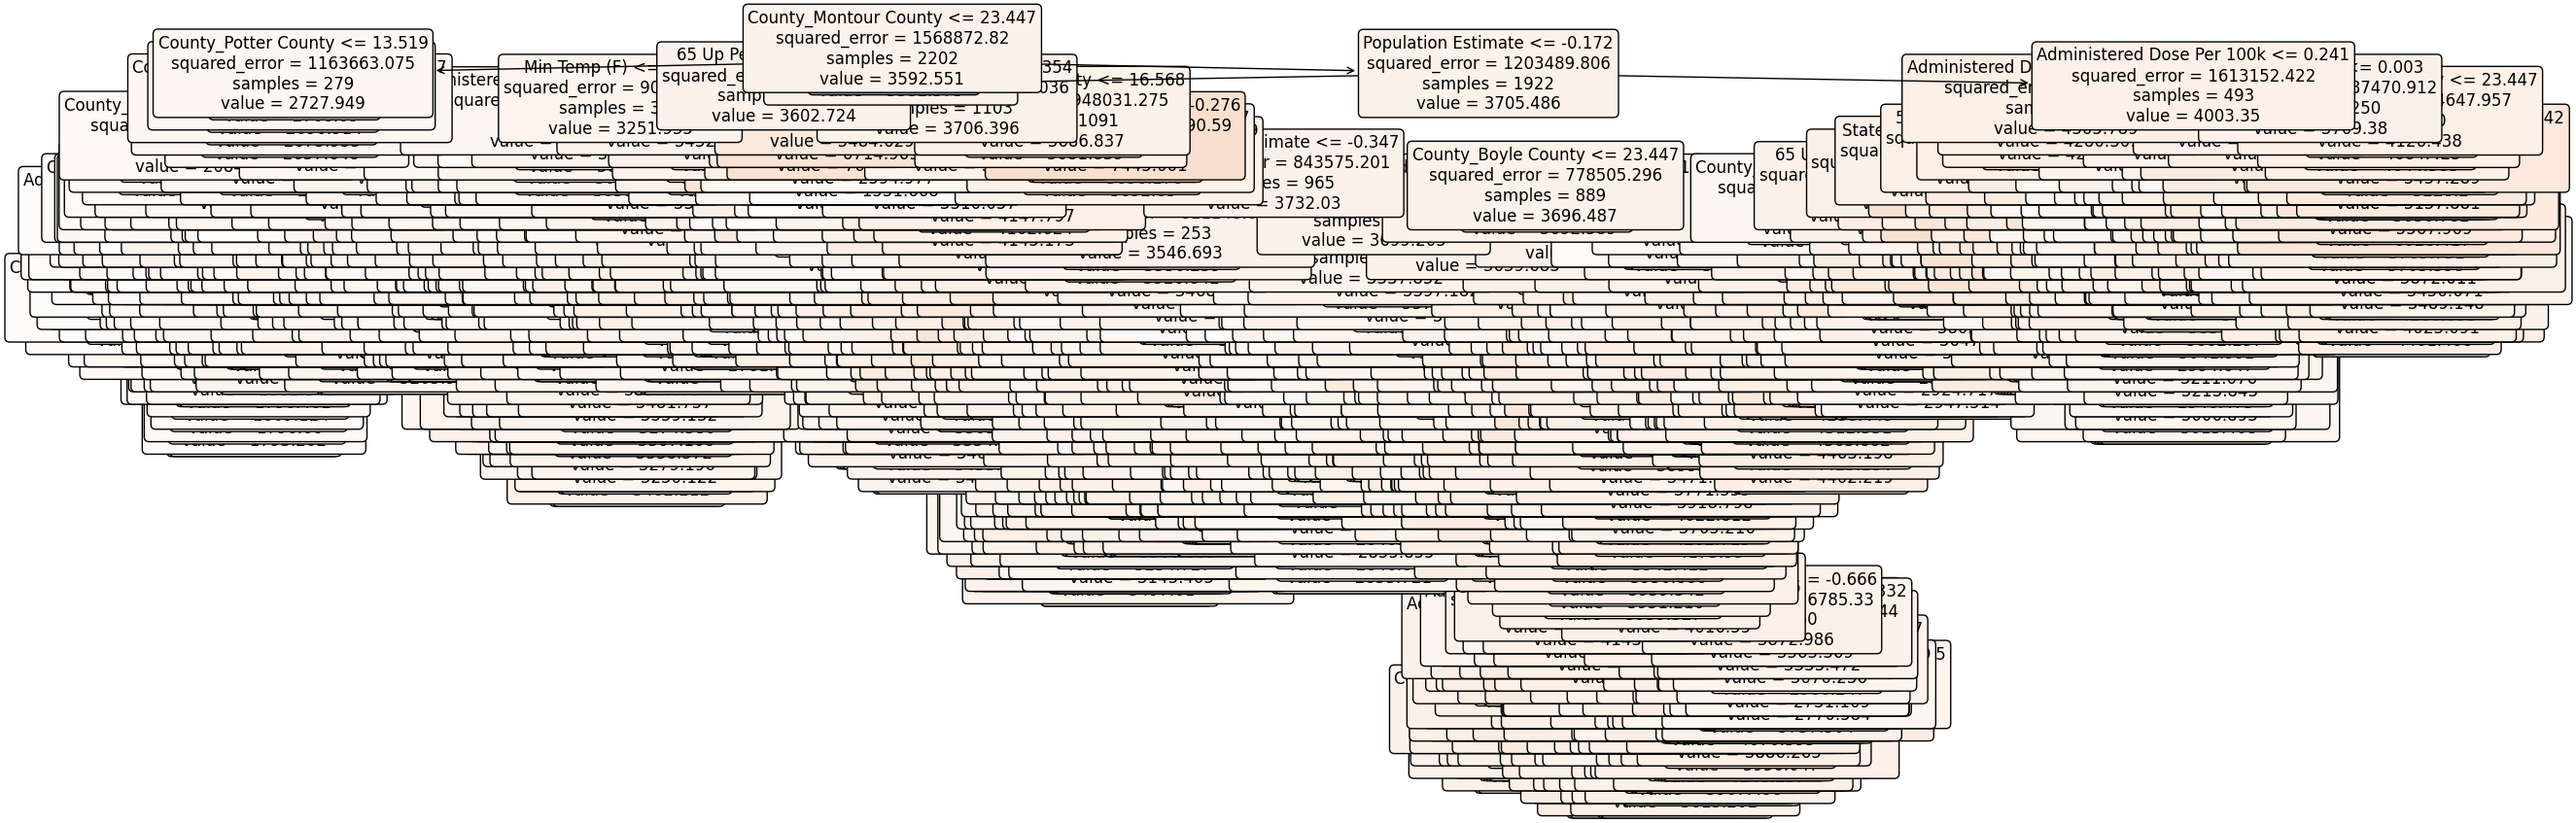

In [71]:
plt.figure(figsize=(30, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.savefig('dec_tree_reg.png')
plt.show()